#### Importing required libraries


In [57]:
# Import libraries
from PIL import Image
import cv2
import numpy as np
import requests

#### Next, we will fetch the image from the internet that we will be working on. We will then resize the image and convert it into a NumPy array.

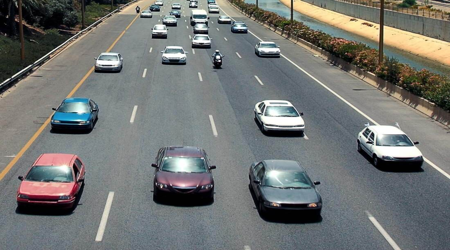

In [58]:
image = Image.open(requests.get('https://marvel-b1-cdn.bc0a.com/f00000000027094/ix-cdn.b2e5.com/images/27094/27094_3063d356a3a54cc3859537fd23c5ba9d_1539205710.jpeg', stream=True).raw)
image = image.resize((450,250))
image_arr = np.array(image)
image

#### To get better output, we will perform some transformations on the image. Here we will convert the image into grayscale

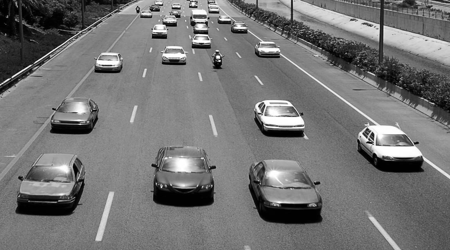

In [59]:
grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

#### Next, we will apply GaussianBlur to remove the noise from the image. Gaussian blur is one of the techniques of image processing. It is widely used in graphics designing too for reducing the noise and smoothing the image so that for further preprocessing, it will generate better output. Along with reducing the noise in the image Gaussian blur technique also reduces the image’s details. Here for applying this preprocessing technique, we will be using the GaussianBlur function().

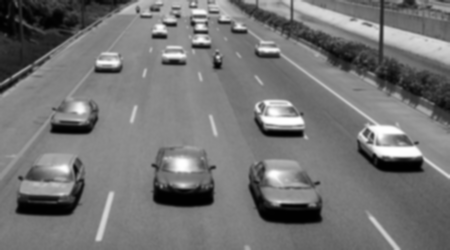

In [60]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

#### Here we will dilate the image. Dilation is one of the morphological techniques where we try to fill the pixels with the element, also known as kernels (structured pieces), to fill the missing parts of the images whenever needed.

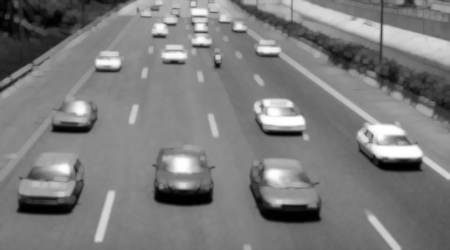

In [61]:
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

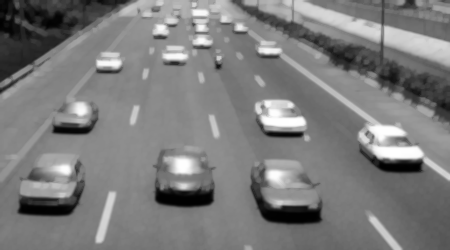

In [62]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
Image.fromarray(closing)

In [63]:
car_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.01, 1)
cars

array([[162,  12,  22,  22],
       [ 10, 161,  77,  77],
       [245, 155,  92,  92],
       [130, 132, 105, 105],
       [151,  36,  44,  44],
       [ 39,  87,  67,  67],
       [247,  91,  69,  69],
       [ 81,  40,  50,  50],
       [237,  22,  82,  82],
       [340, 101, 104, 104],
       [148,  23,  23,  23],
       [365,  52,  43,  43],
       [184,  24,  38,  38]])

13  cars found


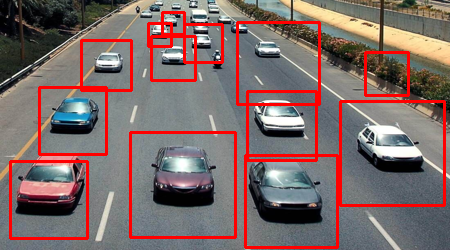

In [64]:
cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)

Open with video

In [71]:
video_capture = cv2.VideoCapture('SnapSave.io-Highway Free footage(720p).mp4')
cnt = 0

if not video_capture.isOpened():
    print("Erro ao abrir o vídeo")
else: 
    while video_capture.isOpened():
    # Ler o próximo quadro
        ret, frame = video_capture.read()

        # Verificar se o quadro foi lido corretamente
        if not ret:
            break

        # Processar o quadro
        grey = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(grey,(5,5),0)
        dilated = cv2.dilate(blur,np.ones((3,3)))
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
        closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)
        car_cascade_src = 'cars.xml'
        car_cascade = cv2.CascadeClassifier(car_cascade_src)
        cars = car_cascade.detectMultiScale(closing, 1.8, 1)

       
        for (x,y,w,h) in cars:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
            cnt += 1
        print(cnt, " cars found")
        
        # Mostrar o quadro
        cv2.imshow('Video', frame)

        # Verificar se a tecla 'q' foi pressionada para sair do loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    video_capture.release()
    cv2.destroyAllWindows()


2  cars found
2  cars found
5  cars found
8  cars found
10  cars found
14  cars found
16  cars found
20  cars found
21  cars found
24  cars found
26  cars found
29  cars found
31  cars found
33  cars found
36  cars found
39  cars found
45  cars found
49  cars found
51  cars found
52  cars found
55  cars found
58  cars found
61  cars found
63  cars found
65  cars found
67  cars found
72  cars found
73  cars found
74  cars found
75  cars found
78  cars found
80  cars found
82  cars found
85  cars found
89  cars found
93  cars found
96  cars found
99  cars found
100  cars found
102  cars found
103  cars found
104  cars found
105  cars found
108  cars found
110  cars found
112  cars found
114  cars found
115  cars found
116  cars found
118  cars found
119  cars found
121  cars found
122  cars found
123  cars found
125  cars found
128  cars found
130  cars found
132  cars found
134  cars found
135  cars found
137  cars found
138  cars found
139  cars found
140  cars found
141  cars found
14